# PyTDA Demo

* PyTDA is a Python module that allows the use to estimate eddy dissipation rate (a measure of turbulence) from Doppler weather radar data. It interfaces seamlessly with Py-ART to make this calculation as simple as one line of code.

* ลิงก์โค้ด https://github.com/openradar/AMS-Short-Course-on-Open-Source-Radar-Software/blob/master/9b_PyTDA_Demo-AMS_OSRSC.ipynb

* ข้อมูลดอปเปอร์ควรจะต้องทำการ dealiaing ก่อน 

* คู่มือการใช้งาน PytDA https://ams.confex.com/ams/95Annual/webprogram/Paper262779.html
* อ่านความหมาย Turbulence หรือ Eddy Dissipation Rate https://www.avwxtraining.com/post/what-is-eddy-dissipation-rate

## ข้อมูลช่วงพายุลูกเห็บเชียงของ 23 เมษายน 2565





In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pyart
import pytda
import cartopy.crs as ccrs
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = LooseVersion('0.98')


# เวลา 17.00 น. Time 1000UTC

## Original doppler

In [5]:
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231000.uf')

In [6]:
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'specific_differential_phase'])


In [7]:
print(radar.instrument_parameters['radar_beam_width_h']['data'][0])

1.0


## พลอต doppler ก่อน unfold

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


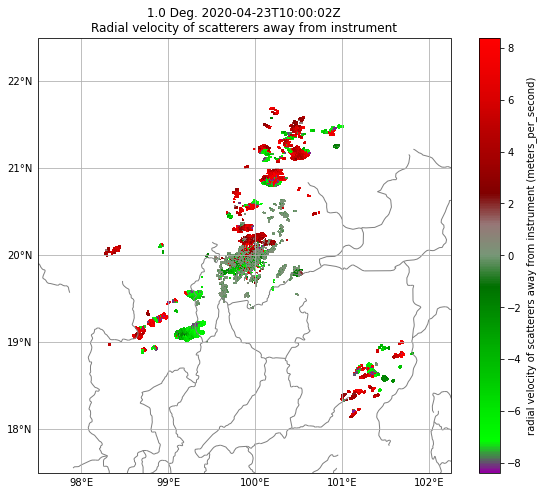

In [8]:
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])

display.plot_ppi_map('velocity', sweep = 0, 
                    vmin = -nyq, vmax = nyq, mask_outside = False,
                    cmap = pyart.graph.cm.NWSVel,
                    resolution = '10m', projection=ccrs.PlateCarree(), 
                    max_lat = 22.5, min_lat =17.5, min_lon = 97.5, max_lon = 102.25, 
                    lat_lines = np.arange(16,24,1.0), lon_lines = np.arange(96, 104, 1.0))

## ผลunfold doppler

In [9]:
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

In [10]:
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'specific_differential_phase', 'corrected_velocity'])


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


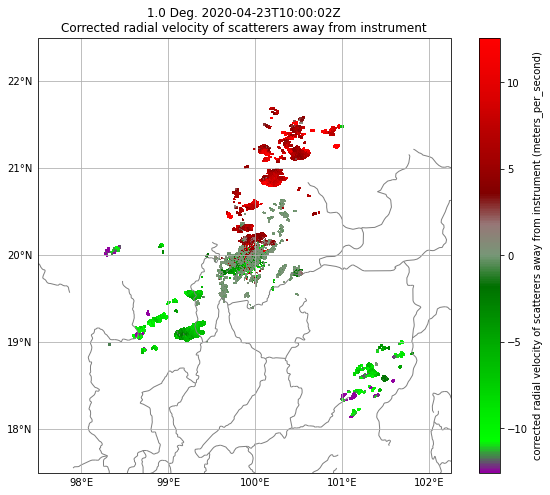

In [11]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])

display.plot_ppi_map('corrected_velocity', sweep = 0, 
                    vmin = -1.5*nyq, vmax = 1.5*nyq, mask_outside = False,
                    cmap = pyart.graph.cm.NWSVel,
                    resolution = '10m', projection=ccrs.PlateCarree(), 
                    max_lat = 22.5, min_lat =17.5, min_lon = 97.5, max_lon = 102.25, 
                    lat_lines = np.arange(16,24,1.0), lon_lines = np.arange(96, 104, 1.0))

## คำนวณ Turbulence (eddy dissipation rate or EDR) ใช้ PTDA

In [12]:
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


In [13]:
def plot_list_of_fields(radar, sweep=0, fields=['corrected_reflectivity'], vmins=[0],
                        vmaxs=[65], units=['dBZ'], cmaps=['RdYlBu_r'],
                        return_flag=False, xlim=[-200, 200], ylim=[-200, 200],
                        mask_tuple=None):
    num_fields = len(fields)
    if mask_tuple is None:
        mask_tuple = []
        for i in np.arange(num_fields):
            mask_tuple.append(None)
    nrows = (num_fields + 1) // 2
    ncols = (num_fields + 1) % 2 + 1
    fig = plt.figure(figsize=(14.0, float(nrows)*5.5))
    display = pyart.graph.RadarDisplay(radar)
    for index, field in enumerate(fields):
        ax = fig.add_subplot(nrows, 2, index+1)
        display.plot_ppi(field, sweep=sweep, vmin=vmins[index],
                         vmax=vmaxs[index],
                         colorbar_label=units[index], cmap=cmaps[index],
                         mask_tuple=mask_tuple[index])
        display.set_limits(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    if return_flag:
        return display

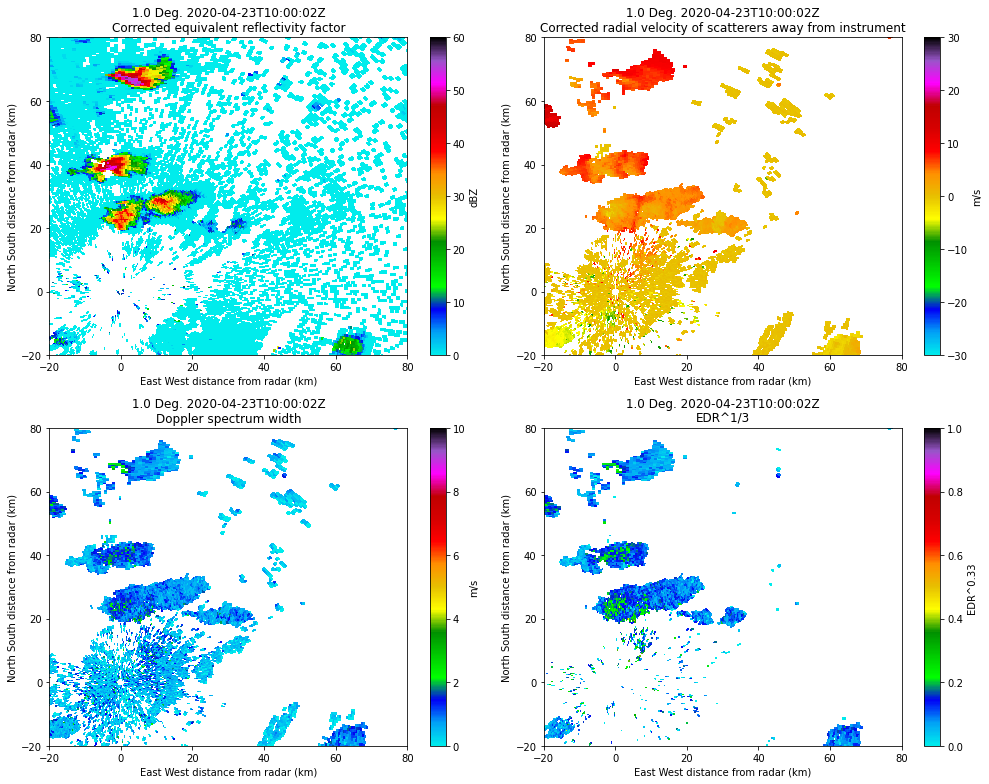

In [15]:
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -30, 0, 0], vmaxs=[60, 30, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# ขยายในกลุ่มฝนที่ก่อให้เกิดพายุลูกเห็บ

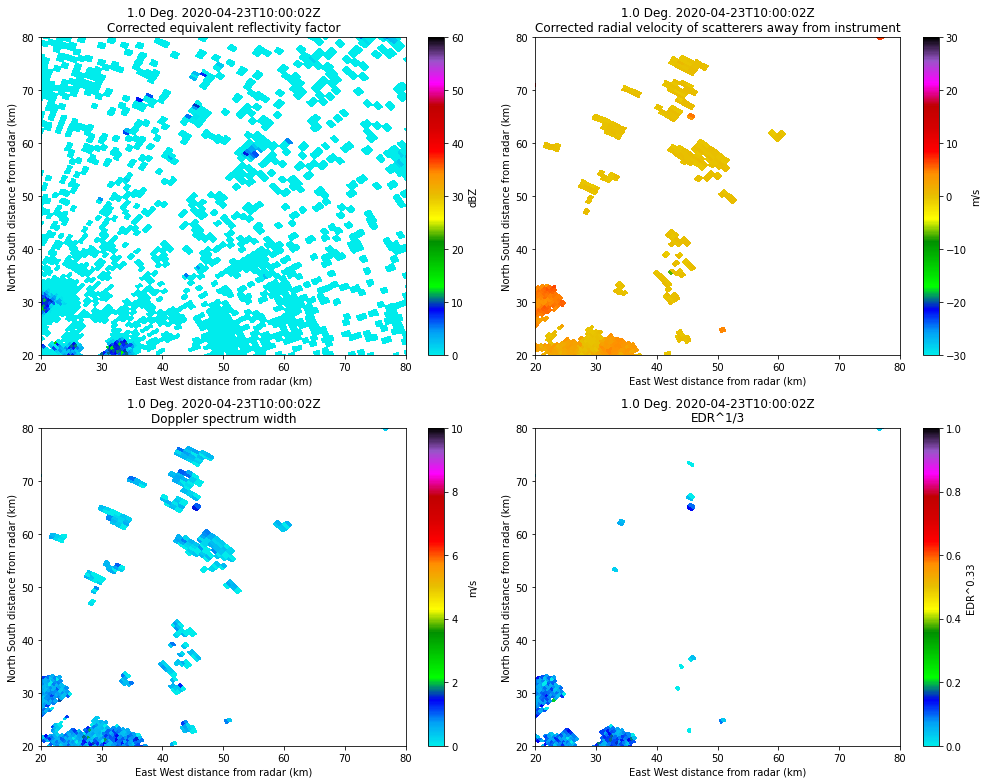

In [18]:
plot_list_of_fields(radar, sweep=0, xlim=[20, 80], ylim=[20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -30, 0, 0], vmaxs=[60, 30, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 17.15 น. Time 1015UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


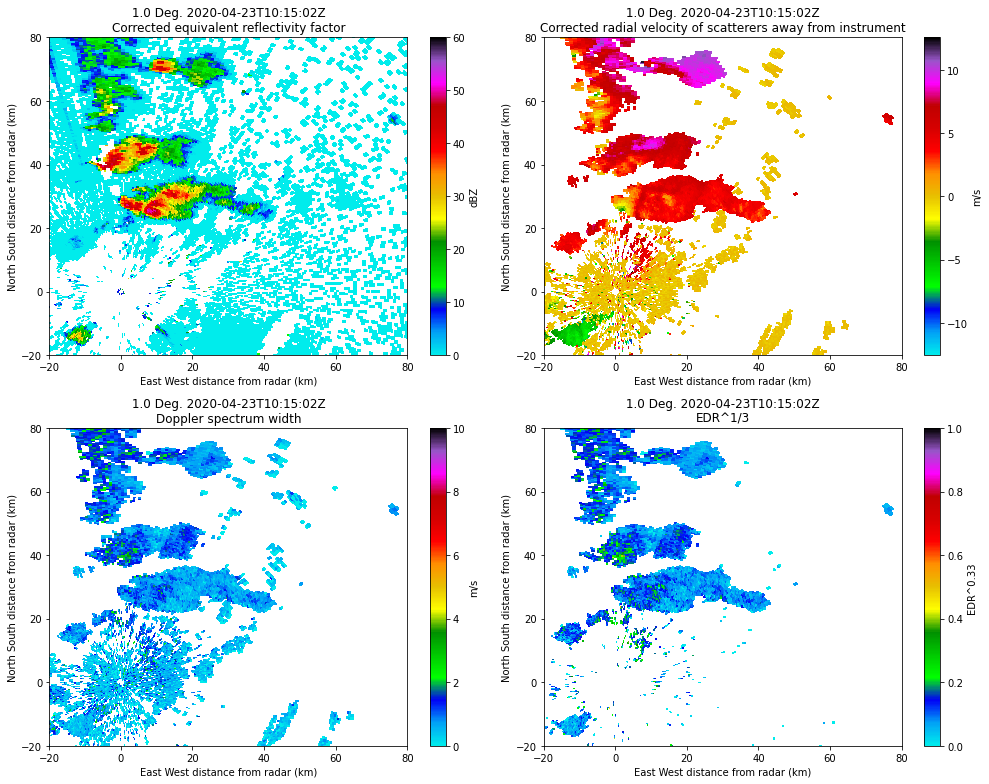

In [29]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231015.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 17.30 น. Time 1030UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


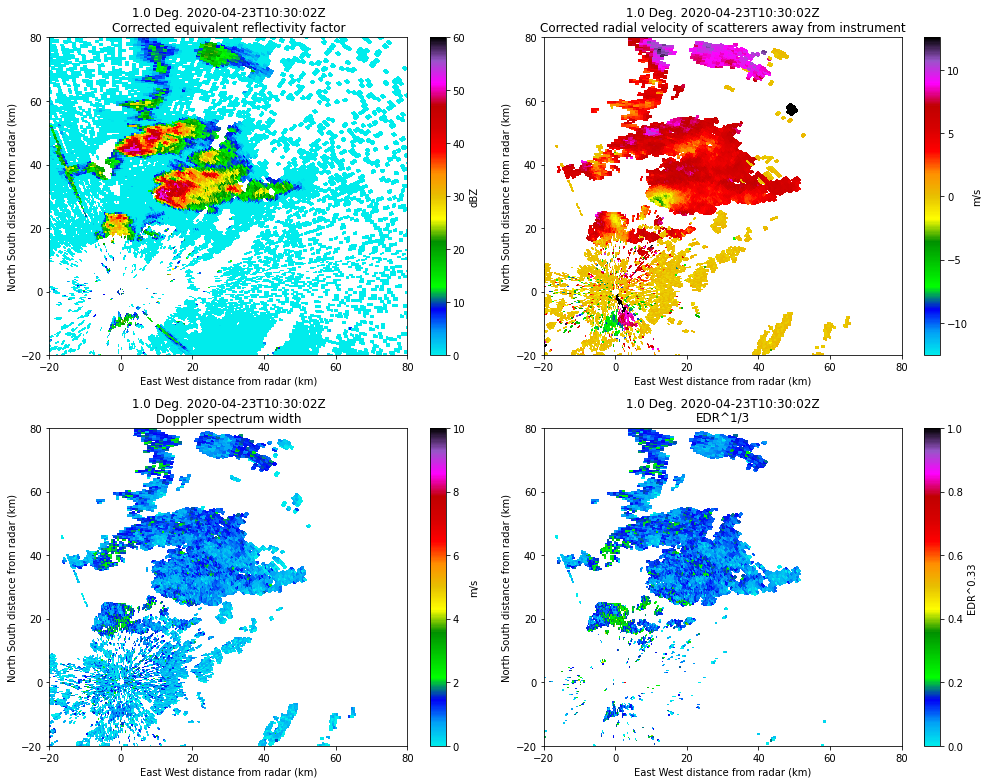

In [30]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231030.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 17.45 น. Time 1045UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


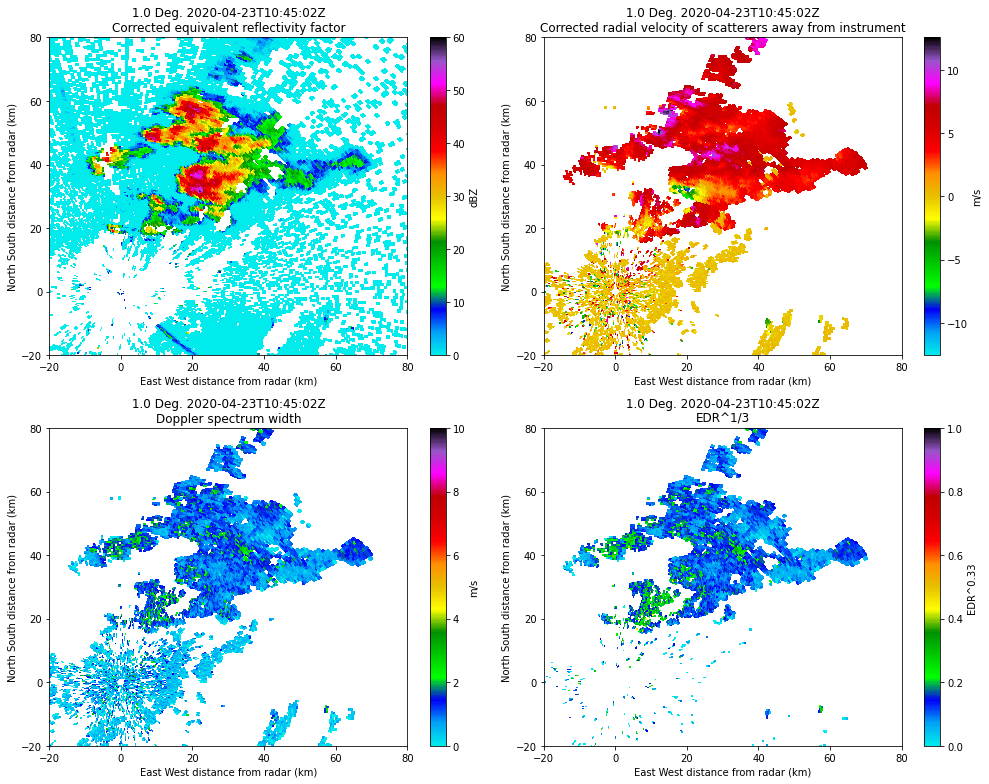

In [31]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231045.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 18.00 น. Time 1100UTC


nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


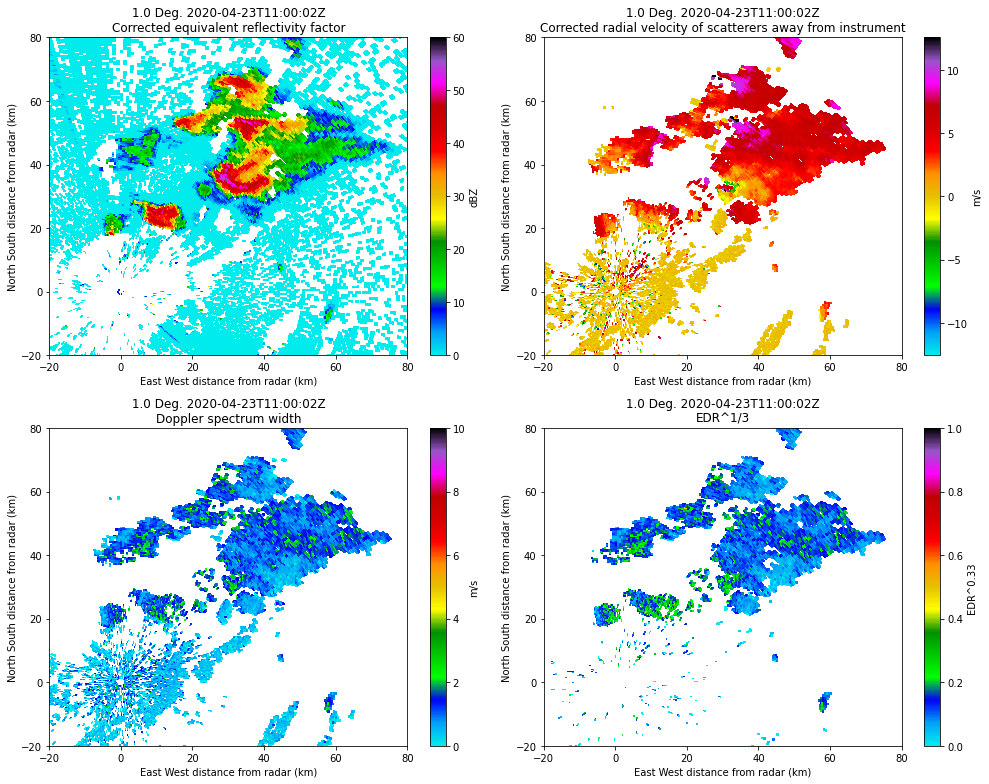

In [32]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231100.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 18.15 น. Time 1115UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


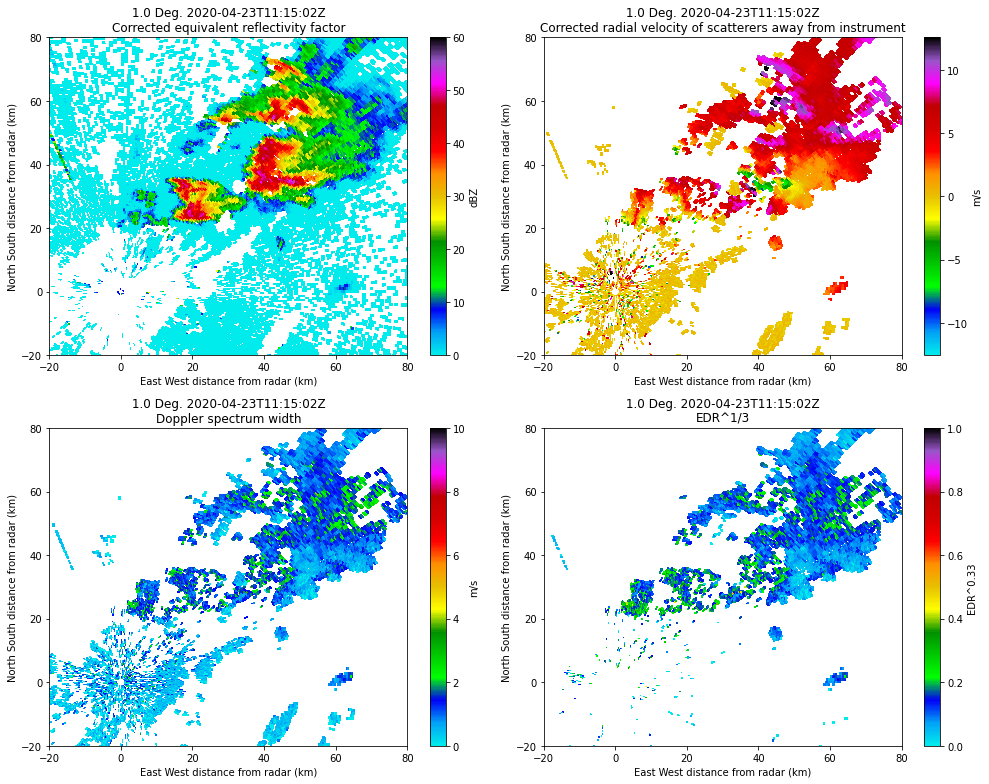

In [33]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231115.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 18.30 น. Time 1130UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


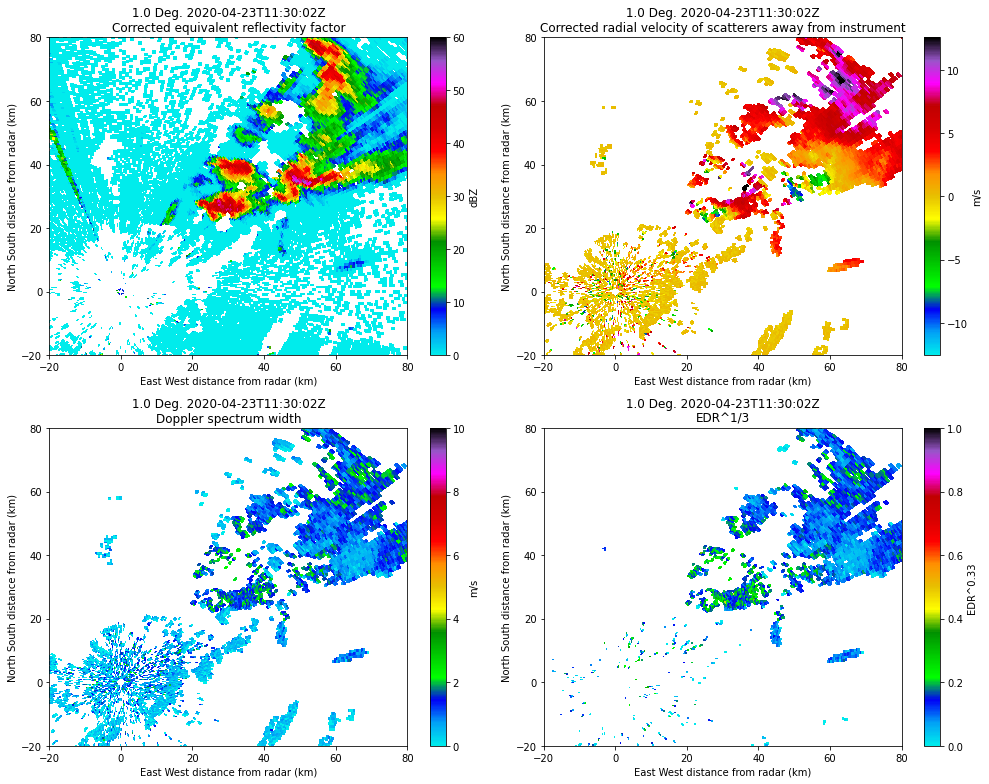

In [34]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231130.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 18.45 น. Time 1145UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


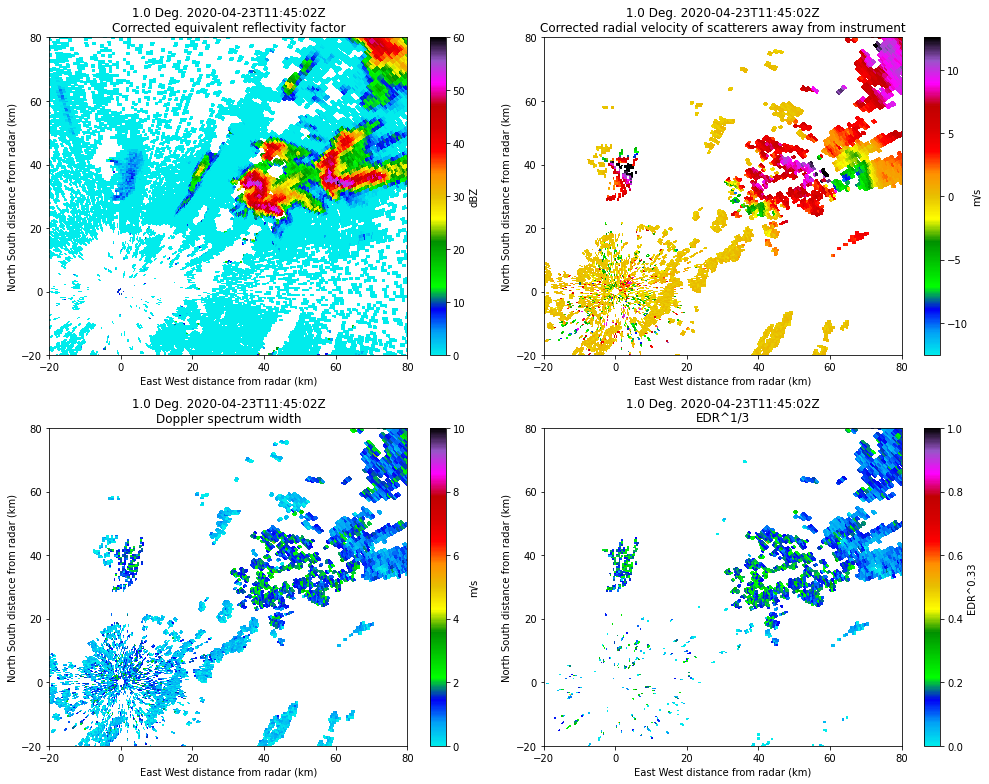

In [35]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231145.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 19.00 น. Time 1200UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


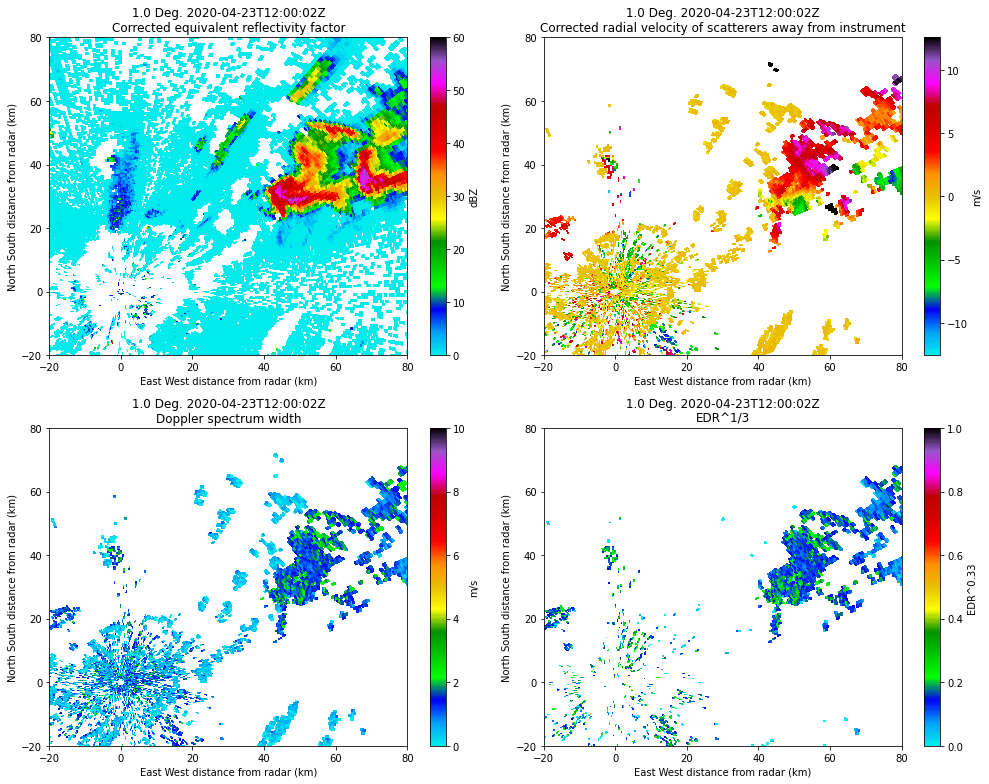

In [36]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231200.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 19.15 น. Time 1215UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


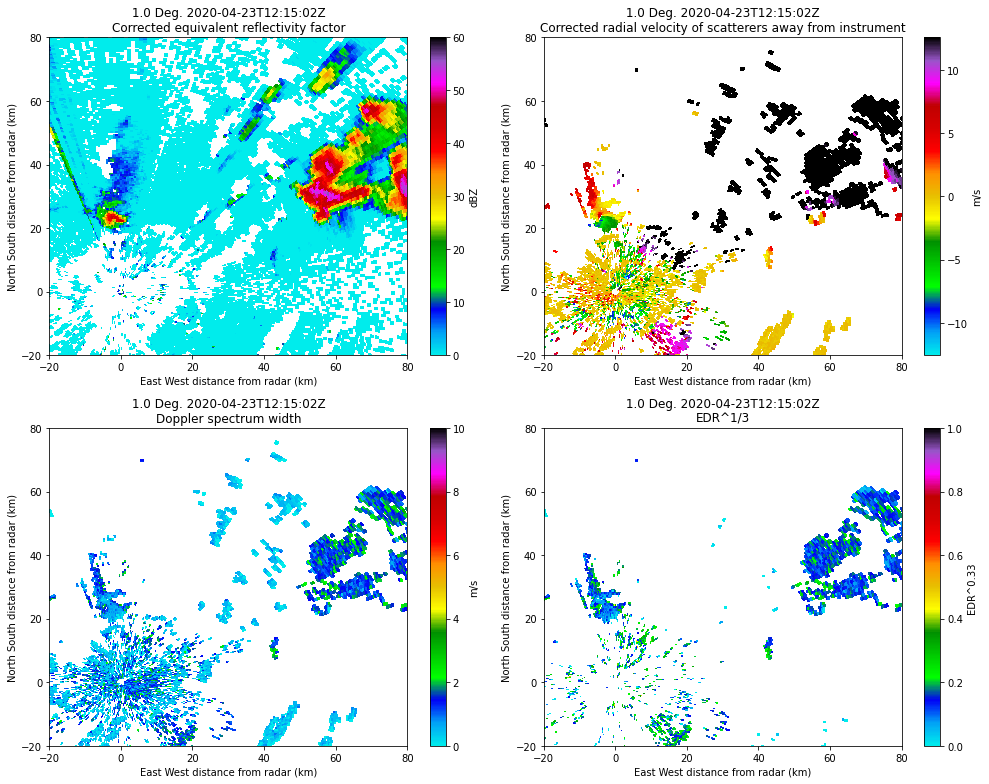

In [37]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231215.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 19.30 น. Time 1230UTC


nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


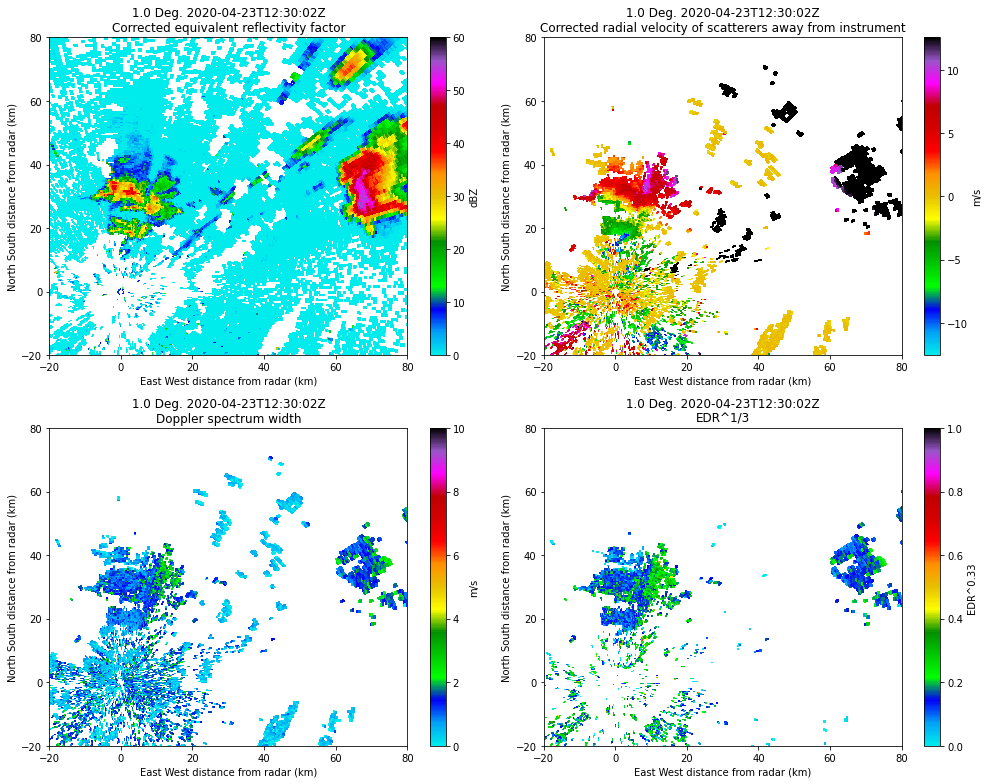

In [38]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231230.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])

# เวลา 19.45 น. Time 1245UTC

nyq:  8.38


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pytda-1.1.1-py3.10-win-amd64.egg\pytda\rsl_tools.py:32: RuntimeWarning: invalid value encountered in arccos
  gr = Re * np.arccos((Re**2 + h**2 - slant_r**2) / (2.0 * Re * h))


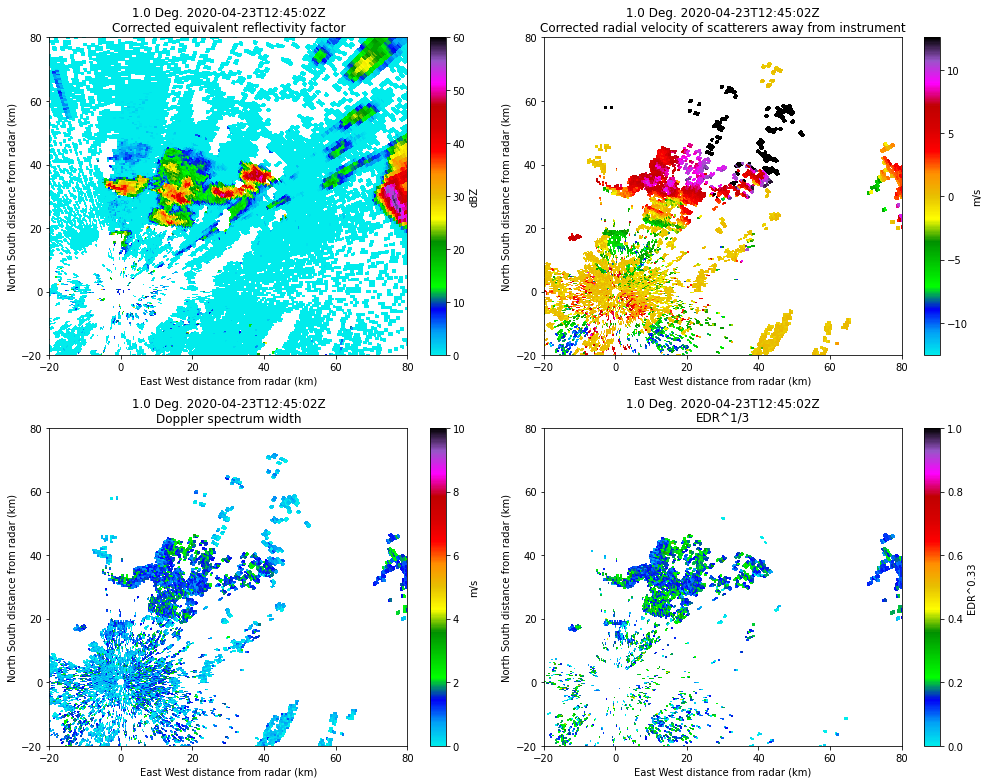

In [39]:
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231245.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณ EDR Turbulence
pytda.calc_turb_vol(radar, name_sw='spectrum_width', name_dz='corrected_reflectivity', verbose=False,
                    gate_spacing=500.0/1000.0, use_ntda=False,
                    beamwidth=radar.instrument_parameters['radar_beam_width_h']['data'][0])

#พลอตแบบพื้นที่ overview
plot_list_of_fields(radar, sweep=0, xlim=[-20, 80], ylim=[-20, 80],
                    fields=['corrected_reflectivity', 'corrected_velocity', 'spectrum_width', 'turbulence'],
                    vmins=[0, -1.5*nyq, 0, 0], vmaxs=[60, 1.5*nyq, 10, 1.0], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    #cmaps=['pyart_LangRainbow12', 'seismic', 'YlOrRd', 'cubehelix'])
                    cmaps=[pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef, pyart.graph.cm.NWSRef])